In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
import warnings as w
w.filterwarnings('ignore')

In [105]:
data=pd.read_csv('/content/insurance (1).csv')

In [106]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [107]:
df=data.copy()
df1=data.copy()
df2=data.copy()
df3=data.copy()
df4=data.copy()

## **Encoding**

In [108]:
df.region	.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

***Label Encoding***

In [109]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [110]:
from pandas.core.dtypes.common import is_numeric_dtype

In [111]:
for i in df.columns:
  if is_numeric_dtype(df[i]):
    continue
  df[i]= le.fit_transform(df[i])  

In [112]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# **Data Split**

In [113]:
x=df.drop(['charges'],axis=1)
x.head(2)

,age,sex,bmi,children,smoker,region
0,19,0,27.90,0,1,3
1,18,1,33.77,1,0,2


In [114]:
y=df['charges']

In [115]:
y.head(2)

0    16884.9240
1     1725.5523
Name: charges, dtype: float64

In [116]:
x.info

<bound method DataFrame.info of       age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]>

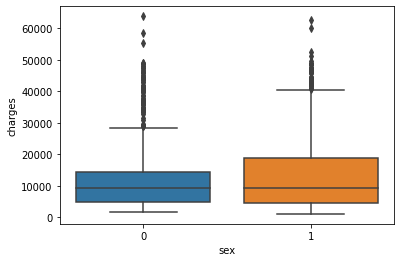

In [117]:
sns.boxplot(x['sex'],y)

In [118]:
x.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [119]:
y.isnull().sum()

0

In [120]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=1)

In [121]:
xtrain.head()

,age,sex,bmi,children,smoker,region
744,50,1,26.41,0,0,1
363,21,0,26.40,1,0,3
10,25,1,26.22,0,0,0
970,50,0,28.16,3,0,2
634,51,1,39.70,1,0,3


In [122]:
ytrain.head()

744     8827.2099
363     2597.7790
10      2721.3208
970    10702.6424
634     9391.3460
Name: charges, dtype: float64

In [123]:
lr=LinearRegression()

In [124]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [125]:
lr.coef_

array([  252.15440619,  -281.16765835,   316.514758  ,   351.46251009,
       24044.37169738,  -318.49464584])

In [126]:
lr.intercept_

-10936.556437496141

In [127]:
#y = m1*x1 + m2*x2 + m3*x3 + c
lr.predict([[50,1,26.41,0,0,1]])
#8827.2099

array([9430.65632658])

In [140]:
x1=xtrain

In [141]:
pred=lr.predict(x1)
pred

array([ 9.43065633e+03,  2.11065428e+03,  3.38515301e+03,  1.10016177e+04,
        1.36037651e+04,  8.44727609e+03,  2.88990637e+04,  3.72146164e+04,
        3.68875358e+03,  6.27798404e+02,  1.41223081e+04,  2.73361405e+04,
        1.14907930e+04,  1.41577934e+04,  5.73682779e+03,  1.84667277e+02,
        1.08016639e+04,  2.66562122e+03,  8.35164936e+03,  1.21644213e+04,
        4.73033543e+03,  6.28230468e+03,  6.97413445e+03,  2.52432045e+04,
       -1.11528211e+03,  1.37952095e+03,  1.47516504e+04,  2.78638188e+04,
        3.01066649e+04,  4.38138693e+03,  5.04988785e+03,  1.03407691e+04,
        1.04514304e+04,  1.09698469e+04,  1.58049639e+04,  7.25216168e+03,
        1.70293490e+04,  9.83540671e+03,  1.21394763e+04,  5.47820491e+03,
        7.32559696e+03,  4.57536386e+03,  5.68145006e+03,  1.14449963e+04,
        3.38903134e+04,  4.71158063e+03,  1.04994379e+04,  8.19271074e+03,
        3.47308637e+04,  3.23561854e+04,  4.84084061e+03,  2.88797125e+03,
        1.16892254e+04,  

In [143]:
x.info

<bound method DataFrame.info of       age  sex     bmi  children  smoker  region
744    50    1  26.410         0       0       1
363    21    0  26.400         1       0       3
10     25    1  26.220         0       0       0
970    50    0  28.160         3       0       2
634    51    1  39.700         1       0       3
...   ...  ...     ...       ...     ...     ...
715    60    1  28.900         0       0       3
905    26    0  29.355         2       0       0
1096   51    0  34.960         2       1       0
235    40    0  22.220         2       1       2
1061   57    1  27.940         1       0       2

[936 rows x 6 columns]>

In [151]:
lr_Score = lr.score(xtest,ytest)

# **KNN Regressor**

In [152]:
from sklearn.neighbors import KNeighborsRegressor

In [153]:
knr = KNeighborsRegressor(n_neighbors=3)

In [154]:
kn=knr.fit(xtest,ytest)

In [155]:
print(kn)

KNeighborsRegressor(n_neighbors=3)


In [156]:
knr.predict(xtest)    # prediction

array([ 1972.73781667, 11746.03648333,  9687.6632    , 16051.69987   ,
        1888.95033333, 16515.26418333, 16051.69987   , 11247.00133333,
        7950.20493333, 10096.69196667, 12594.89465   , 35423.723     ,
       12295.92959333,  7118.54571667,  1333.80303333,  8781.58766667,
       11246.94553667,  8465.28014667, 17623.63628667, 13300.3581    ,
       14244.13188667, 34817.75422667, 13108.39493333, 14505.63943333,
       12383.52858333, 12212.18731667, 16111.52861333,  8640.02713333,
        5505.43548333,  3940.92241667, 11551.09363333, 12374.84061333,
       20740.97688333, 12506.8436    , 20271.74653333, 14683.46468333,
       30466.23194667, 12557.62308333, 11956.19016667, 26684.46159   ,
        4420.1013    , 11778.8114    , 13502.59042667, 17333.67388667,
       13562.38966667, 18309.75037   , 10366.08615   , 18954.07936667,
        9633.36238333, 14259.46463333, 13343.10836667, 11007.308     ,
        7125.81516667, 14125.93325   , 11755.10358333,  4878.9174    ,
      

In [157]:
knn_score=knr.score(xtest,ytest)
knn_score                

0.5174144226520633

# ***Accuracy = LR VS KNN***

In [158]:
lr_Score

0.7403677168975319

In [159]:
knn_score

0.5174144226520633

In [162]:
com=lr_Score-knn_score
com

0.22295329424546861

In [163]:
d = {'Algorithm name': ['linear_Regression','KNN Regressor'], 'Accuracy': [lr_Score,knn_score]}

In [164]:
d

{'Algorithm name': ['linear_Regression', 'KNN Regressor'],
 'Accuracy': [0.7403677168975319, 0.5174144226520633]}

In [166]:
dfa=pd.DataFrame(d)
dfa

,Algorithm name,Accuracy
0,linear_Regression,0.740368
1,KNN Regressor,0.517414


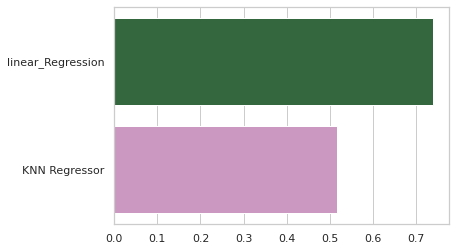

In [199]:
sns.set_theme(style="whitegrid")
b=sns.barplot(y="Algorithm name",x="Accuracy",data=d,palette="cubehelix",capsize=.2)